In [1]:
# 24 archivos??

# Obtener los tickers que siempre están en NAFTRAC, que siempre se repiten
# Deberían ser menos de 35



#### LAB 1 (Pasiva)

1. Leer archiovs Naftrac / Obtener tickers repetidos
- 32 tickers + cash = 100%
- Pesos(w): Naftrac (31-01-2021)

2. Precios de los 32 tickers en las 24 fechas (obtener precios
- Guradar precios.csv

3. Pasiva 
- Portafolio inicial
    - Capital (1M)
    - Cash

In [1]:
import os
import glob
import pandas as pd
import yfinance as yf
import numpy as np
import itertools
from datetime import datetime
import locale
locale.setlocale(locale.LC_TIME, 'es_ES')

import functions # Archivo de funciones

In [2]:
csv_files = functions.read_multiple_csv("/Users/pablorivera/Library/CloudStorage/OneDrive-ITESO/ITESO 10º Semestre/Microestructura y Sistemas de Trading/Laboratorio_1-Inversion_de_Capital/files")
csv_df = csv_files[1] # 1 para dataframe 0 para archivos (direcciones)
csv_df

,Ticker,Nombre,Clase de activo,Peso (%),Precio,Acciones,Valor de mercado,Valor nominal,Sector,Unnamed: 9,ISIN,Bolsa de valores,Ubicación,Moneda,Mercado de divisas,Tipo de Cambio,SEDOL,Unnamed: 1,Unnamed: 10
0,AMXL,AMERICA MOVIL L,Equity,11.86,15.58,"433,866,211.00","6,759,635,567.38","6,759,635,567.38",Comunicación,2667470,MXP001691213,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,NaN,NaN,NaN
1,GFNORTEO,GPO FINANCE BANORTE,Equity,10.81,137.48,"44,842,100.00","6,164,891,908.00","6,164,891,908.00",Financieros,2421041,MXP370711014,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,NaN,NaN,NaN
2,WALMEX*,WALMART DE MEXICO V,Equity,10.63,65.40,"92,646,791.00","6,059,100,131.40","6,059,100,131.40",Productos básicos de consumo,BW1YVH8,MX01WA000038,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,NaN,NaN,NaN
3,FEMSAUBD,FOMENTO ECONOMICO MEXICANO,Equity,9.99,167.39,"34,004,964.00","5,692,090,923.96","5,692,090,923.96",Productos básicos de consumo,2242059,MXP320321310,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,NaN,NaN,NaN
4,GMEXICOB,GRUPO MEXICO B,Equity,9.95,97.14,"58,397,693.00","5,672,751,898.02","5,672,751,898.02",Materiales,2643674,MXP370841019,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,BOLSAA,BOLSA MEXICANA DE VALORES,Equity,0.63,36.39,"9,134,957.00","332,421,085.23","332,421,085.23",Financieros,NaN,MX01BM1B0000,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,B39VVF6,NaN,NaN
32,VOLARA,CONTROLADORA VUELA COMPANIA DE AVI,Equity,0.55,17.98,"16,192,902.00","291,148,377.96","291,148,377.96",Industriales,NaN,MX01VO000009,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,BDZDPH6,NaN,NaN
33,RA,REGIONAL SAB DE CV,Equity,0.51,108.77,"2,491,078.00","270,954,554.06","270,954,554.06",Financieros,NaN,MX01R0000006,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,BG1Z6X0,NaN,NaN
34,MEGACPO,MEGACABLE HOLDINGS CPO,Equity,0.46,42.25,"5,783,295.00","244,344,213.75","244,344,213.75",Comunicación,NaN,MX01ME090003,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,B292SM8,NaN,NaN


In [3]:
c_tickers = functions.get_constant_tickers(csv_df, 'MXN.MX')
c_tickers

['AC.MX',
 'ALFAA.MX',
 'ALSEA.MX',
 'AMXL.MX',
 'ASURB.MX',
 'BBAJIOO.MX',
 'BIMBOA.MX',
 'BOLSAA.MX',
 'CEMEXCPO.MX',
 'CUERVO.MX',
 'ELEKTRA.MX',
 'FEMSAUBD.MX',
 'GAPB.MX',
 'GCARSOA1.MX',
 'GCC.MX',
 'GFINBURO.MX',
 'GFNORTEO.MX',
 'GMEXICOB.MX',
 'GRUMAB.MX',
 'KIMBERA.MX',
 'KOFUBL.MX',
 'LIVEPOLC-1.MX',
 'MEGACPO.MX',
 'OMAB.MX',
 'ORBIA.MX',
 'PE&OLES.MX',
 'PINFRA.MX',
 'Q.MX',
 'TLEVISACPO.MX',
 'VESTA.MX',
 'WALMEX.MX']

In [5]:
# Pasivo

In [6]:
# Periodo 2+ años: 31-01-2021 a 25-01-2023

In [5]:
all_files = csv_files[0]

In [6]:
all_dates = functions.get_all_dates(all_files)
all_dates

['31-may-2021',
 '30-jun-2022',
 '30-jul-2021',
 '31-mar-2021',
 '30-jun-2021',
 '31-may-2022',
 '30-abr-2021',
 '25-ene-2023',
 '26-feb-2021',
 '31-mar-2022',
 '26-ene-2022',
 '31-oct-2022',
 '30-sep-2022',
 '31-ago-2021',
 '30-nov-2021',
 '30-dic-2022',
 '29-jul-22',
 '29-ene-2021',
 '28-feb-2022',
 '26-oct-2021',
 '31-dic-2021',
 '30-sep-2021',
 '29-abr-2022',
 '30-nov-2022',
 '31-ago-2022']

In [7]:
dts = functions.replace_list_value(all_dates, '29-jul-22', '29-jul-2022')
dts

['31-may-2021',
 '30-jun-2022',
 '30-jul-2021',
 '31-mar-2021',
 '30-jun-2021',
 '31-may-2022',
 '30-abr-2021',
 '25-ene-2023',
 '26-feb-2021',
 '31-mar-2022',
 '26-ene-2022',
 '31-oct-2022',
 '30-sep-2022',
 '31-ago-2021',
 '30-nov-2021',
 '30-dic-2022',
 '29-jul-2022',
 '29-ene-2021',
 '28-feb-2022',
 '26-oct-2021',
 '31-dic-2021',
 '30-sep-2021',
 '29-abr-2022',
 '30-nov-2022',
 '31-ago-2022']

In [8]:
dates_fd = [functions.str_to_datetime(i, '%d-%b-%Y', '%Y-%m-%d') for i in dts]
dates_fd.sort() # Importante
dates_fd


['2021-01-29',
 '2021-02-26',
 '2021-03-31',
 '2021-04-30',
 '2021-05-31',
 '2021-06-30',
 '2021-07-30',
 '2021-08-31',
 '2021-09-30',
 '2021-10-26',
 '2021-11-30',
 '2021-12-31',
 '2022-01-26',
 '2022-02-28',
 '2022-03-31',
 '2022-04-29',
 '2022-05-31',
 '2022-06-30',
 '2022-07-29',
 '2022-08-31',
 '2022-09-30',
 '2022-10-31',
 '2022-11-30',
 '2022-12-30',
 '2023-01-25']

In [9]:
#y,m,d

In [10]:
prices = functions.get_ticker_prices(c_tickers, dates_fd);
prices

[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*****

Close                                                        \
                 AC.MX ALFAA.MX   ALSEA.MX    AMXL.MX    ASURB.MX BBAJIOO.MX   
Date                                                                           
2021-01-29   93.070000    12.90  23.110001  13.670000  322.529999  24.760000   
2021-02-26   94.769997    11.39  25.440001  13.390000  391.429993  24.030001   
2021-03-31  100.849998    11.80  30.280001  13.960000  363.029999  27.570000   
2021-04-30  108.459999    14.17  32.950001  14.150000  342.609985  32.119999   
2021-05-31  113.040001    13.98  33.410000  15.580000  363.279999  34.590000   
2021-06-30  115.620003    14.96  35.470001  15.000000  367.890015  35.759998   
2021-07-30  120.459999    15.16  40.369999  16.680000  361.609985  35.639999   
2021-08-31  129.369995    14.10  39.259998  19.770000  360.429993  38.439999   
2021-09-30  125.879997    14.31  41.610001  18.260000  385.769989  39.000000   
2021-10-26  125.160004    15.40  45.430000  18.000000  393.320007  40.459999   
2021-11-30  130.770004    15.33  36.689999  18.809999  392.829987  36.029999   
2021-12-31  130.520004    15.02  37.950001  21.690001  422.760010  36.799999   
2022-01-26  123.610001    14.58  40.790001  19.809999  402.649994  37.480000   
2022-02-28  135.119995    15.34  44.360001  18.510000  442.910004  49.750000   
2022-03-31  135.250000    15.11  49.860001  21.120001  443.929993  54.610001   
2022-04-29  129.490005    13.67  44.730000  19.860001  445.369995  50.389999   
2022-05-31  133.789993    15.12  42.150002  20.809999  429.950012  48.549999   
2022-06-30  132.500000    14.28  38.080002  20.549999  395.230011  40.310001   
2022-07-29  141.210007    14.01  39.660000  19.400000  384.000000  47.939999   
2022-08-31  137.149994    12.82  36.560001  17.170000  426.709991  42.020000   
2022-09-30  145.009995    12.80  36.150002  16.590000  396.000000  50.990002   
2022-10-31  161.860001    13.16  38.060001  18.700001  464.970001  55.779999   
2022-11-30  160.600006    13.50  38.799999  18.750000  478.500000  62.689999   
2022-12-30  158.039993    12.43  36.779999  17.600000  454.010010  61.380001   
2023-01-25  164.699997    13.64  44.599998  19.959999  544.619995  71.470001   

                                                         ...                \
            BIMBOA.MX  BOLSAA.MX CEMEXCPO.MX  CUERVO.MX  ... LIVEPOLC-1.MX   
Date                                                     ...                 
2021-01-29  38.520000  46.000000   11.760000  43.730000  ...     65.510002   
2021-02-26  39.299999  42.849998   13.940000  43.150002  ...     63.330002   
2021-03-31  42.900002  41.250000   14.420000  46.759998  ...     71.629997   
2021-04-30  40.540001  44.939999   16.090000  48.310001  ...     85.690002   
2021-05-31  43.849998  44.500000   16.809999  50.189999  ...     84.220001   
2021-06-30  43.889999  43.910000   16.820000  52.439999  ...     88.750000   
2021-07-30  45.880001  40.630001   16.240000  49.810001  ...     94.099998   
2021-08-31  50.820000  41.599998   16.500000  51.189999  ...     89.050003   
2021-09-30  58.040001  39.720001   14.890000  44.820000  ...     85.379997   
2021-10-26  57.439999  40.639999   13.870000  44.040001  ...     92.470001   
2021-11-30  56.220001  36.160000   13.300000  49.110001  ...     82.320000   
2021-12-31  62.970001  38.919998   13.990000  51.360001  ...     88.760002   
2022-01-26  62.389999  34.869999   12.530000  47.790001  ...     95.690002   
2022-02-28  63.070000  39.220001   10.520000  51.360001  ...     99.459999   
2022-03-31  60.060001  42.060001   10.690000  48.950001  ...    101.459999   
2022-04-29  62.900002  40.430000    8.980000  50.869999  ...    102.879997   
2022-05-31  64.720001  36.250000    9.260000  44.330002  ...    103.870003   
2022-06-30  65.370003  35.689999    7.830000  43.500000  ...     87.010002   
2022-07-29  72.040001  37.939999    8.230000  46.139999  ...     91.480003   
2022-08-31  66.220001  36.389999    7.470000  41.200001  ...

In [11]:
ponderaciones = pd.read_csv('files/NAFTRAC_20210129.csv', skiprows = 2).dropna()
ponderaciones

,Ticker,Nombre,Clase de activo,Peso (%),Precio,Acciones,Valor de mercado,Valor nominal,Sector,Unnamed: 9,ISIN,Bolsa de valores,Ubicación,Moneda,Mercado de divisas,Tipo de Cambio
0,AMXL,AMERICA MOVIL L,Equity,12.29,13.67,"471,480,741.00","6,445,141,729.47","6,445,141,729.47",Comunicación,2667470,MXP001691213,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
1,WALMEX*,WALMART DE MEXICO V,Equity,11.14,58.35,"100,125,728.00","5,842,336,228.80","5,842,336,228.80",Productos básicos de consumo,BW1YVH8,MX01WA000038,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
2,GMEXICOB,GRUPO MEXICO B,Equity,10.57,87.84,"63,111,774.00","5,543,738,228.16","5,543,738,228.16",Materiales,2643674,MXP370841019,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
3,FEMSAUBD,FOMENTO ECONOMICO MEXICANO,Equity,9.79,139.70,"36,750,033.00","5,133,979,610.10","5,133,979,610.10",Productos básicos de consumo,2242059,MXP320321310,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
4,GFNORTEO,GPO FINANCE BANORTE,Equity,9.39,101.57,"48,461,797.00","4,922,264,721.29","4,922,264,721.29",Financieros,2421041,MXP370711014,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
5,CEMEXCPO,CEMEX CPO,Equity,6.71,11.76,"299,310,319.00","3,519,889,351.44","3,519,889,351.44",Materiales,2406457,MXP225611567,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
6,GAPB,GRUPO AEROPORTUARIO DEL PACIFICO,Equity,3.08,206.60,"7,825,718.00","1,616,793,338.80","1,616,793,338.80",Industriales,B0ZV104,MX01GA000004,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
7,ELEKTRA*,GRUPO ELEKTRA,Equity,3.05,"1,386.01","1,153,721.00","1,599,068,843.21","1,599,068,843.21",Financieros,2967084,MX01EL000003,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
8,TLEVISACPO,GRUPO TELEVISA,Equity,2.96,30.99,"50,027,403.00","1,550,349,218.97","1,550,349,218.97",Comunicación,2380108,MXP4987V1378,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
9,ASURB,GRUPO AEROPORTUARIO DEL SURESTE B,Equity,2.43,322.53,"3,944,151.00","1,272,107,022.03","1,272,107,022.03",Industriales,2639349,MXP001661018,Bolsa Mexicana De Valores,México,MXN,MXN,1.0


In [12]:
p2 = ponderaciones.iloc[:,0] + '.MX'
p2 = [s.replace('*', '') for s in p2]
p2 = [s.replace('LIVEPOLC.1', 'LIVEPOLC-1') for s in p2]
ponderaciones['Ticker'] = p2

In [13]:
ponderaciones.set_index('Ticker', inplace = True)

In [14]:
ponderaciones

,Nombre,Clase de activo,Peso (%),Precio,Acciones,Valor de mercado,Valor nominal,Sector,Unnamed: 9,ISIN,Bolsa de valores,Ubicación,Moneda,Mercado de divisas,Tipo de Cambio
Ticker,,,,,,,,,,,,,,,
AMXL.MX,AMERICA MOVIL L,Equity,12.29,13.67,"471,480,741.00","6,445,141,729.47","6,445,141,729.47",Comunicación,2667470,MXP001691213,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
WALMEX.MX,WALMART DE MEXICO V,Equity,11.14,58.35,"100,125,728.00","5,842,336,228.80","5,842,336,228.80",Productos básicos de consumo,BW1YVH8,MX01WA000038,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
GMEXICOB.MX,GRUPO MEXICO B,Equity,10.57,87.84,"63,111,774.00","5,543,738,228.16","5,543,738,228.16",Materiales,2643674,MXP370841019,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
FEMSAUBD.MX,FOMENTO ECONOMICO MEXICANO,Equity,9.79,139.70,"36,750,033.00","5,133,979,610.10","5,133,979,610.10",Productos básicos de consumo,2242059,MXP320321310,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
GFNORTEO.MX,GPO FINANCE BANORTE,Equity,9.39,101.57,"48,461,797.00","4,922,264,721.29","4,922,264,721.29",Financieros,2421041,MXP370711014,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
CEMEXCPO.MX,CEMEX CPO,Equity,6.71,11.76,"299,310,319.00","3,519,889,351.44","3,519,889,351.44",Materiales,2406457,MXP225611567,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
GAPB.MX,GRUPO AEROPORTUARIO DEL PACIFICO,Equity,3.08,206.60,"7,825,718.00","1,616,793,338.80","1,616,793,338.80",Industriales,B0ZV104,MX01GA000004,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
ELEKTRA.MX,GRUPO ELEKTRA,Equity,3.05,"1,386.01","1,153,721.00","1,599,068,843.21","1,599,068,843.21",Financieros,2967084,MX01EL000003,Bolsa Mexicana De Valores,México,MXN,MXN,1.0
TLEVISACPO.MX,GRUPO TELEVISA,Equity,2.96,30.99,"50,027,403.00","1,550,349,218.97","1,550,349,218.97",Comunicación,2380108,MXP4987V1378,Bolsa Mexicana De Valores,México,MXN,MXN,1.0


In [16]:
cash = ponderaciones.loc['MXN.MX', 'Peso (%)'] / 100
cash 

0.0031

In [15]:
pond = [ponderaciones.loc[i, 'Peso (%)'] for i in c_tickers]
pond

[1.55,
 1.36,
 0.44,
 12.29,
 2.43,
 0.67,
 2.04,
 0.82,
 6.71,
 0.9,
 3.05,
 9.79,
 3.08,
 0.88,
 0.8,
 1.49,
 9.39,
 10.57,
 1.79,
 1.91,
 1.76,
 0.49,
 0.84,
 1.57,
 1.68,
 1.43,
 1.21,
 0.7,
 2.96,
 0.82,
 11.14]

In [23]:
sum(pond) 

96.55999999999999

In [ ]:
#ponderaciones = ponderaciones.loc[c_tickers]
#ponderaciones.sort_index(inplace = True)
#ponderaciones

In [54]:
comision = 0.00125 

In [53]:
pc = prices.iloc[0,:].values * (1 + (comision))
pc

array([  93.18633719,   12.91612462,   23.13888811,   13.68708758,
        322.93316128,   24.79095023,   38.56815046,   46.0575    ,
         11.77470023,   43.78466204, 1387.74252228,  139.87462194,
        206.85825611,   51.65448765,  130.58302317,   18.30285069,
        101.69696219,   87.94979633,  225.34132256,   35.85476388,
         89.03114817,   65.59188964,   74.21265275,  121.14123536,
         44.23522531,  307.1334375 ,  154.25257256,  107.85465122,
         31.02873727,   38.69831403,   58.42293597])

In [57]:
cap = 1000000 
#cap = cap - (cap * cash)

titulos = [int((i / 100) * cap) for i in pond] / pc
titulos = titulos.astype(int)
titulos, cap

(array([ 166, 1052,  190, 8979,   75,  270,  528,  178, 5698,  205,   21,
         699,  148,  170,   61,  814,  923, 1201,   79,  532,  197,   74,
         113,  129,  379,   46,   78,   64,  953,  211, 1906]),
 1000000)

In [58]:
#[int((i / 100) * cap) for i in pond]

In [30]:
#titulos * prices.loc[dates_fd[0]].values

In [59]:
def monthly_perf_pasive(ticks, weights, prices, date: str, capital):

    df = pd.DataFrame(data = {'Tickers': ticks,
                             'Ponderación': weights,
                             f"Precio ({date})": prices,
                             'Títulos': titulos
                             })
    cap = 1000000

    money = [int((i / 100) * cap) for i in weights]
    
    #df['Títulos'] = (money / df['Precio']).astype(int)
    df['Valor posición'] = round(df[f"Precio ({date})"] * df['Títulos'], 2)
    df['Restante'] = money - df['Valor posición']
     
    #capital_f = np.sum(df['Valor posición'])
    
    df = df.append(df.sum(numeric_only=True), ignore_index=True)
    
    return df# + capital_f#, sum(df['Valor posición'])

In [60]:
monthly_reports = [monthly_perf_pasive(c_tickers, pond, prices.loc[i].values, i, 1000000) for i in dates_fd]
monthly_reports

[          Tickers  Ponderación  Precio (2021-01-29)  Títulos  Valor posición  \
 0           AC.MX         1.55            93.070000    166.0        15449.62   
 1        ALFAA.MX         1.36            12.900000   1052.0        13570.80   
 2        ALSEA.MX         0.44            23.110001    190.0         4390.90   
 3         AMXL.MX        12.29            13.670000   8979.0       122742.93   
 4        ASURB.MX         2.43           322.529999     75.0        24189.75   
 5      BBAJIOO.MX         0.67            24.760000    270.0         6685.20   
 6       BIMBOA.MX         2.04            38.520000    528.0        20338.56   
 7       BOLSAA.MX         0.82            46.000000    178.0         8188.00   
 8     CEMEXCPO.MX         6.71            11.760000   5698.0        67008.48   
 9       CUERVO.MX         0.90            43.730000    205.0         8964.65   
 10     ELEKTRA.MX         3.05          1386.010010     21.0        29106.21   
 11    FEMSAUBD.MX         9

In [61]:
monthly_reports[0]

,Tickers,Ponderación,Precio (2021-01-29),Títulos,Valor posición,Restante
0,AC.MX,1.55,93.070000,166.0,15449.62,50.38
1,ALFAA.MX,1.36,12.900000,1052.0,13570.80,29.20
2,ALSEA.MX,0.44,23.110001,190.0,4390.90,9.10
3,AMXL.MX,12.29,13.670000,8979.0,122742.93,157.07
4,ASURB.MX,2.43,322.529999,75.0,24189.75,110.25
5,BBAJIOO.MX,0.67,24.760000,270.0,6685.20,14.80
6,BIMBOA.MX,2.04,38.520000,528.0,20338.56,61.44
7,BOLSAA.MX,0.82,46.000000,178.0,8188.00,11.00
8,CEMEXCPO.MX,6.71,11.760000,5698.0,67008.48,91.52
9,CUERVO.MX,0.90,43.730000,205.0,8964.65,35.35


In [62]:
pasive_results = [monthly_reports[i].iloc[-1,4] for i in range(len(monthly_reports))]
pasive_results

[961561.1,
 998509.0700000001,
 1058646.6199999999,
 1075245.36,
 1141315.7999999998,
 1127827.5100000002,
 1141847.51,
 1196991.89,
 1153159.6400000001,
 1174843.71,
 1120143.3799999997,
 1199746.59,
 1147289.1400000001,
 1200379.21,
 1271882.7000000002,
 1155999.8,
 1164627.7999999998,
 1072286.96,
 1085003.1300000001,
 1012686.77,
 1002591.1900000001,
 1122632.7599999998,
 1160883.41,
 1088186.16,
 1235089.7499999998]

In [63]:
import matplotlib.pyplot as plt

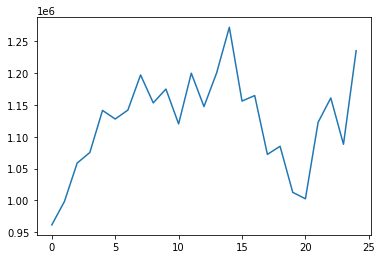

In [65]:
plt.plot(pasive_results);

In [ ]:
comision = 0.00125 
# Creating DataFrame
df = pd.DataFrame(columns=['timestamp', 'capital', 'rend', 'rend_acum'])

capital = [precio[i] * ponderacion[i] for i in range(len(c_tickers))]
df['capital'] = capital

df['rend'] = [df['capital'][i] - df['capital'][i+1] for i in range(len(df))]

df['rend_acum'] = cumsum(df['rend'])

#Estableciendo lo inicial
df['capital'][0] = capital - comision
df['rend'][0] = 0
df['rend_acum'][0] = 0

df['capital'][-1] = df['capital'][-1] - comision

#print(df)
df

## Plantillas para dataframes

In [ ]:
import pandas as pd

In [8]:
#PASIVA

comision = 0.00125 
# Creating DataFrame
df = pd.DataFrame(columns=['timestamp', 'capital', 'rend', 'rend_acum'])

capital = [precio[i] * ponderacion[i] for i in range(len(c_tickers))]
df['capital'] = capital

df['rend'] = [df['capital'][i] - df['capital'][i+1] for i in range(len(df))]

df['rend_acum'] = cumsum(df['rend'])

#Estableciendo lo inicial
df['capital'][0] = capital - comision
df['rend'][0] = 0
df['rend_acum'][0] = 0

df['capital'][-1] = df['capital'][-1] - comision

#print(df)
df

,timestamp,capital,rend,rend_acum


In [7]:
#ACTIVA

# Creating DataFrame
df2 = pd.DataFrame(columns=['timestamp', 'titulos_totales', 'titulos_compra', 'comisión', 'comision_acum'])

df2['titulos totales'] = capital

df2['titulos_compra'] = [df['capital'][i] - df['capital'][i+1] for i in range(len(df))]

df2['comision'] = 

df2['comision_acum'] = cumsum(df['comision'])


#print(df2)
df2

,timestamp,titulos_totales,titulos_compra,comisión,comision_acum


In [6]:
#NOTA: rf : Tasa libre de riesgo para México, anual al 01 de enero 2021 (0.0429)


# Creating DataFrame
data333 = {'medida': ['rend_m', 'rend_c', 'sharpe'],
        'descripcion': ['Rendimiento Promedio Mensual', 'Rendimiento Mensual Acumulado', 'Sharpe Ratio']}
df3 = pd.DataFrame(data333, columns=['medida', 'descripcion', 'inv_activa', 'inv_pasiva'])

  
# Printing Empty DataFrame
df3

,medida,descripcion,inv_activa,inv_pasiva
0,rend_m,Rendimiento Promedio Mensual,NaN,NaN
1,rend_c,Rendimiento Mensual Acumulado,NaN,NaN
2,sharpe,Sharpe Ratio,NaN,NaN
